In [2]:
%3_KVA_TRANSFORMER NOTEBOOK
% HIGH SIDE RATED VOLTS = 220V   HIGH SIDE RATED CURRENT = 13.64 AMPS
% lOW SIDE RATED VOLTS = 110V    LOW SIDE RATED CURRENT = 27.27 AMPS


In [13]:
% DC RESISTANCE TEST @ 1 AMP
dc_ix1=1.034; %dc current
dc_vx1=0.158; %dc volts
a1= dc_vx1/dc_ix1 %low side dc resistance value
dc_ih1=1.14; %dc current
dc_vh1=0.382; %dc volts
b1= dc_vh1/dc_ih1 %high side dc resistance value

a1 =  0.15280
b1 =  0.33509


In [14]:
% DC RESISTANCE TEST @ 2 AMP
dc_ix2=2.016; %dc current
dc_vx2=0.301; %dc volts
a2= dc_vx2/dc_ix2 %low side dc resistance value
dc_ih2=2.1; %dc current
dc_vh2=0.705; %dc volts
b2= dc_vh2/dc_ih2 %high side dc resistance value

a2 =  0.14931
b2 =  0.33571


In [15]:
% DC RESISTANCE TEST @ 3 AMP
dc_ix3=3.09; %dc current
dc_vx3=0.471; %dc volts
a3= dc_vx3/dc_ix3 %low side dc resistance value
dc_ih3=3.09; %dc current
dc_vh3=1.033; %dc volts
b3= dc_vh3/dc_ih3 %high side dc resistance value

a3 =  0.15243
b3 =  0.33430


In [16]:
% AVERAGE DC RESISTANCE VALUES
rx_dc= (a1+a2+a3)/3
rh_dc= (b1+b2+b3)/3
% MEASURED RESISTANCE VALUES WITH MULTIMETER ARE WAY OFF.

rx_dc =  0.15151
rh_dc =  0.33504


In [70]:
%MAGNETIZATION CURVE FROM LOW SIDE EXCITATION
%LOAD CSV DATA
csv1= fopen('Low_side_mag_curve.csv');
mag_data= textscan(csv1,'%f %f','Headerlines',1,'Delimiter',','); %Load data from mag_curve
i_H= mag_data{1,1}(:,1); %Data representing the H auxiliar field
v_B= mag_data{1,2}(:,1); %Data representing the B magnetic field


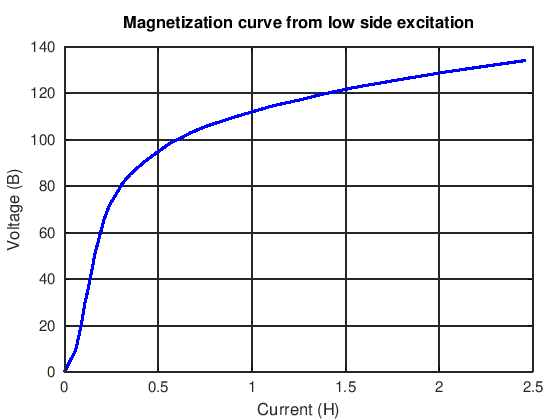

In [71]:
% MAGNETIZATION CURVE PLOT
plot(v_B,i_H,'b','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('Magnetization curve from low side excitation')
xlabel('Current (H)')
ylabel('Voltage (B)')

In [76]:
% MAGNETIZING INDUCTANCE FROM B-H DATA
f=60; % Source frequency
w= 2*pi*f; % Source angular speed
M_ind= v_B./(w.*(i_H));

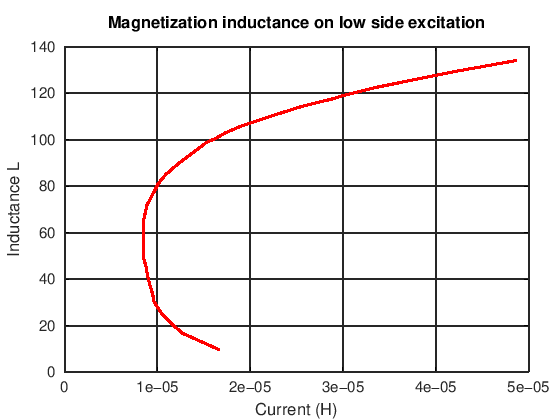

In [77]:
% MAGNETIZATION INDUCTANCE PLOT
plot(M_ind,i_H,'r','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('Magnetization inductance on low side excitation')
xlabel('Current (H)')
ylabel('Inductance L')

In [53]:
%NO LOAD TEST FROM LOW SIDE AT RATED VOLTAGE 110V
%LOAD CSV DATA
t= linspace(-1,1,15000)';
csv2= fopen('Exciting_current_rated.csv'); % Load exciting current data at rated voltage
csv3= fopen('No_load_input_volt_rated.csv'); % Load no load input rated voltage

i_rated_data= textscan(csv2,'%f %f','Headerlines',2,'Delimiter',','); %Load current data
i_rated_nl= i_rated_data{1,2}(:,1); %Data representing the exciting current waveform

v_rated_data= textscan(csv3,'%f %f','Headerlines',2,'Delimiter',','); %Load voltage data
v_rated_nl= v_rated_data{1,2}(:,1); %Data representing the no load input rated voltage


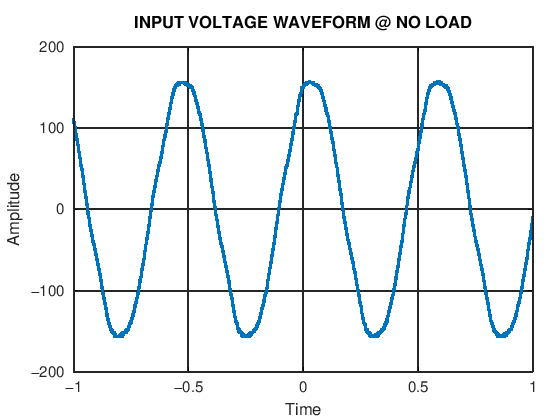

In [60]:
% NO LOAD INPUT RATED VOLTAGE PLOT
plot(t,v_rated_nl,'linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('INPUT VOLTAGE WAVEFORM @ NO LOAD')
xlabel('Time')
ylabel('Amplitude')

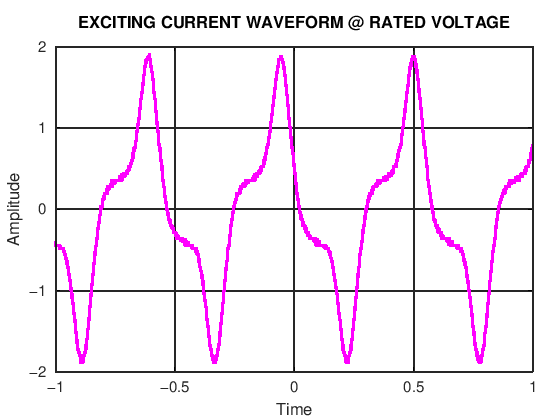

In [62]:
% EXCITING CURRENT PLOT AT RATED VOLTAGE
plot(t,i_rated_nl,'m','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('EXCITING CURRENT WAVEFORM @ RATED VOLTAGE')
xlabel('Time')
ylabel('Amplitude')

In [56]:
%INSTANTANEOUS POWER AT NO LOAD
p_inst_rated= v_rated_nl.*i_rated_nl; 

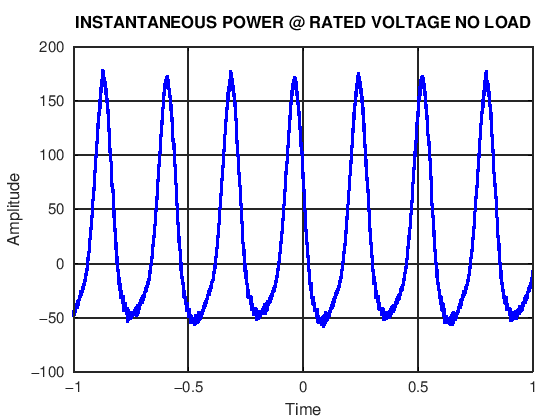

In [65]:
% INSTANTANEOUS POWER PLOT AT RATED VOLTAGE, NO LOAD
plot(t,p_inst_rated,'b','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('INSTANTANEOUS POWER @ RATED VOLTAGE NO LOAD')
xlabel('Time')
ylabel('Amplitude')

In [162]:
% RMS VOLTAGE AND CURRENT CALCULATIONS @ RATED INPUT
V_rated_rms= EC_rms(v_rated_nl)
I_rated_rms= EC_rms(i_rated_nl)

V_rated_rms =  111.55
I_rated_rms =  0.93461


In [163]:
% AVERAGE LOSSES @ RATED INPUT
p_rated= mean(p_inst_rated)

p_rated =  23.184


In [128]:
%NO LOAD TEST FROM LOW SIDE AT MAINS VOLTAGE 135V
%LOAD CSV DATA
csv4= fopen('Exciting_current_mains.csv'); % Load exciting current data at mains voltage
csv5= fopen('No_load_input_volt_mains.csv'); % Load no load input mains voltage data

i_mains_data= textscan(csv4,'%f %f','Headerlines',2,'Delimiter',','); %Load current data
i_mains_nl= i_mains_data{1,2}(:,1); %Data representing the exciting current waveform 

v_mains_data= textscan(csv5,'%f %f','Headerlines',2,'Delimiter',','); %Load voltage data
v_mains_nl= v_mains_data{1,2}(:,1); %Data representing the no load input mains voltage

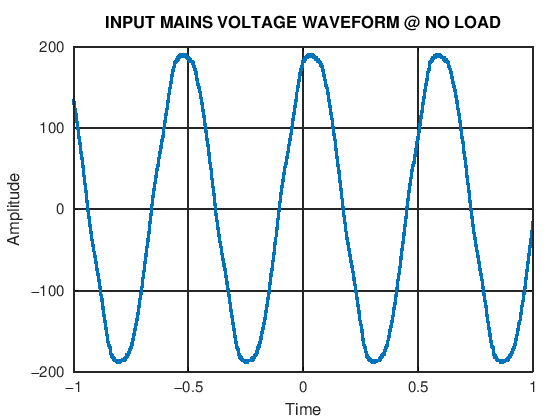

In [129]:
% NO LOAD INPUT MAINS VOLTAGE PLOT
plot(t,v_mains_nl,'linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('INPUT MAINS VOLTAGE WAVEFORM @ NO LOAD')
xlabel('Time')
ylabel('Amplitude')

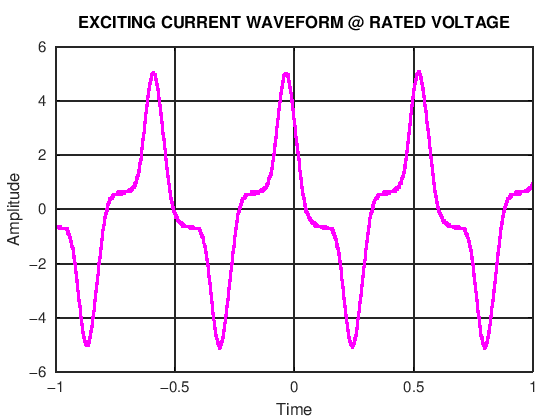

In [131]:
% EXCITING CURRENT PLOT AT MAINS VOLTAGE
plot(t,i_mains_nl,'m','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('EXCITING CURRENT WAVEFORM @ RATED VOLTAGE')
xlabel('Time')
ylabel('Amplitude')

In [132]:
%INSTANTANEOUS POWER AT NO LOAD MAINS EXCITATION
p_inst_mains= v_mains_nl.*i_mains_nl; 

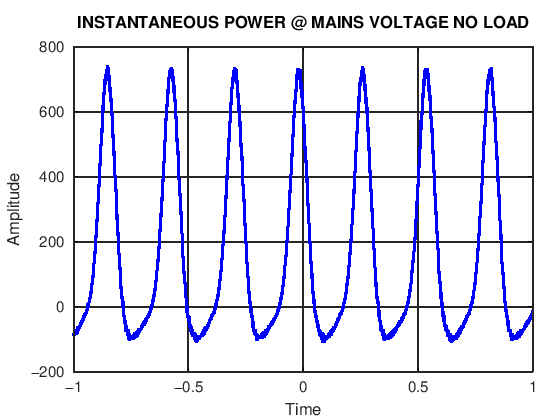

In [133]:
% INSTANTANEOUS POWER PLOT AT MAINS VOLTAGE, NO LOAD
plot(t,p_inst_mains,'b','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('INSTANTANEOUS POWER @ MAINS VOLTAGE NO LOAD')
xlabel('Time')
ylabel('Amplitude')

In [134]:
% RMS VOLTAGE AND CURRENT CALCULATIONS @ MAINS INPUT 135V
V_mains_rms= EC_rms(v_mains_nl)
I_mains_rms= EC_rms(i_mains_nl)

V_mains_rms =  135.07
I_mains_rms =  2.4492


In [135]:
% AVERAGE LOSSES @ MAINS INPUT
p_mains= mean(p_inst_mains)

p_mains =  162.88


In [144]:
% LOAD SHORT CIRCUIT TEST DATA
%LOAD CSV DATA
csv6= fopen('High_side_sc_amps.csv'); % Load short circuit current on high side
csv7= fopen('High_side_sc_volts.csv'); % Load short circuit voltage on high side

i_sc_data= textscan(csv7,'%f %f','Headerlines',2,'Delimiter',','); %Load current data
i_sc= i_sc_data{1,2}(:,1); %Data representing the short circuit current waveform 

v_sc_data= textscan(csv6,'%f %f','Headerlines',2,'Delimiter',','); %Load voltage data
v_sc= v_sc_data{1,2}(:,1); %Data representing the short circuit voltage


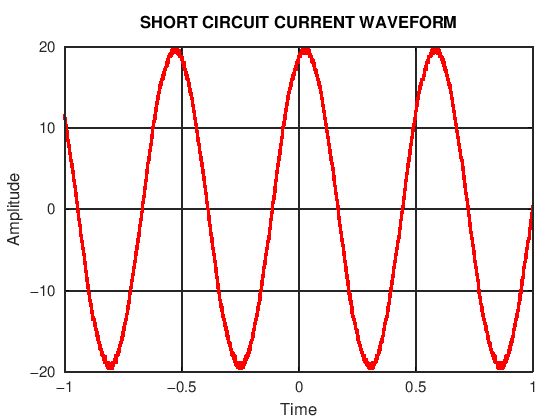

In [145]:
% SHORT CIRCUIT CURRENT PLOT 
plot(t,i_sc,'r','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('SHORT CIRCUIT CURRENT WAVEFORM')
xlabel('Time')
ylabel('Amplitude')

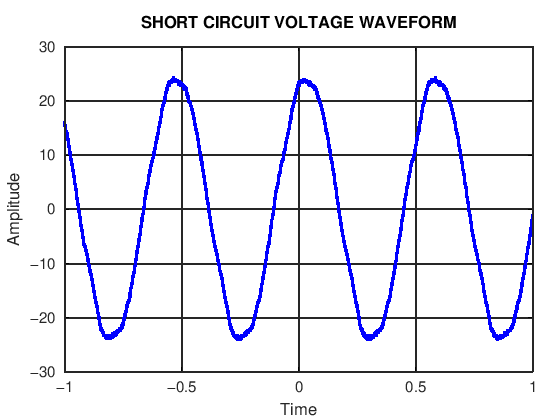

In [146]:
% SHORT CIRCUIT VOLTAGE PLOT 
plot(t,v_sc,'b','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('SHORT CIRCUIT VOLTAGE WAVEFORM')
xlabel('Time')
ylabel('Amplitude')

In [151]:
%INSTANTANEOUS POWER AT SHORT CIRCUIT
p_inst_sc= v_sc.*i_sc; 

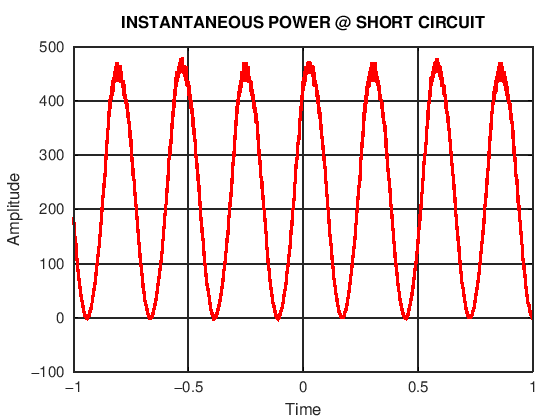

In [152]:
% INSTANTANEOUS POWER PLOT AT SHORT CIRCUIT
plot(t,p_inst_sc,'r','linewidth',8)
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('INSTANTANEOUS POWER @ SHORT CIRCUIT')
xlabel('Time')
ylabel('Amplitude')

In [153]:
% RMS VOLTAGE AND CURRENT CALCULATIONS @ SHORT CIRCUIT
V_sc_rms= EC_rms(v_sc)
I_sc_rms= EC_rms(i_sc)

V_sc_rms =  16.865
I_sc_rms =  13.526


In [155]:
% AVERAGE LOSSES @ SHORT CIRCUIT
p_sc= mean(p_inst_sc)

p_sc =  227.08


In [168]:
% EQUIVALENT CIRCUIT PARAMETER CALCULATIONS @ RATED VALUES
%LOW SIDE EXCITING ADMITTANCE
Rc= ((V_rated_rms)^2)/p_rated
S_rated_nl= V_rated_rms*I_rated_rms;
Q_rated_nl= sqrt((S_rated_nl^2)-(p_rated^2));
Xm= ((V_rated_rms)^2)/Q_rated_nl

Rc =  536.77
Xm =  122.42


In [169]:
% EQUIVALENT CIRCUIT PARAMETER CALCULATIONS @ RATED VALUES
%HIGH SIDE SHORT CIRCUIT IMPEDANCE
Zsc= V_sc_rms/I_sc_rms;
S_sc= V_sc_rms*I_sc_rms;
Pf_sc= p_sc/S_sc;
angle_sc= acosd(Pf_sc);
R_sc= Zsc*cosd(angle_sc)
X_sc= Zsc*sind(angle_sc)

R_sc =  1.2412
X_sc =  0.11868


In [170]:
% EQUIVALENT CIRCUIT PARAMETER CALCULATIONS @ RATED VALUES
%LEAKAGE IMPEDANCES ON HIGH SIDE
X_h= X_sc/2
R_h= R_sc/2


X_h =  0.059340
R_h =  0.62061


In [171]:
% EQUIVALENT CIRCUIT PARAMETER CALCULATIONS @ RATED VALUES
%LEAKAGE IMPEDANCES ON lOW SIDE
Vs=220;
Vp=110;
a=220/110;
X_x= X_h/(a^2)
R_x= R_h/(a^2)


X_x =  0.014835
R_x =  0.15515


In [173]:
% TEST #1 COMPUTING EXCITING CURRENT VALUE FROM A SINUSOIDAL RATED EXCITATION ON LOW SIDE
V_t= 155.6*sin(w*t);
v_test= EC_rms(V_t)

v_test =  110.02


In [174]:
%EQUIVALENT MAG IMPEDANCE
z1=complex(R_x,X_x);
za=complex(Rc,0);
zb=complex(Xm,0);
zm=(za*zb)/(za+zb);
zt= zm+z1;
i_test= v_test/zt;
i_test_a= abs(i_test)

i_test_a =  1.1020
